In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['GOOG', 'MSFT']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG, MSFT]
company_name = ["GOOGLE", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-25,345.019989,346.200012,337.619995,340.670013,340.670013,55053800,MICROSOFT
2023-10-26,340.540009,341.630005,326.940002,327.890015,327.890015,37828500,MICROSOFT
2023-10-27,330.429993,336.720001,328.399994,329.809998,329.809998,29856500,MICROSOFT
2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22828100,MICROSOFT
2023-10-31,338.850006,339.000000,334.690002,338.109985,338.109985,20265300,MICROSOFT
2023-11-01,339.790009,347.420013,339.649994,346.070007,346.070007,28158800,MICROSOFT
2023-11-02,347.239990,348.829987,344.769989,348.320007,348.320007,24348100,MICROSOFT
2023-11-03,349.630005,354.390015,347.329987,352.799988,352.799988,23624000,MICROSOFT
2023-11-06,353.450012,357.540009,353.350006,356.529999,356.529999,23828300,MICROSOFT


In [44]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,113.192470,114.681255,112.055434,113.427590,113.427590,2.592524e+07
std,16.866896,16.888311,16.802673,16.825061,16.825061,1.063968e+07
min,86.720001,88.209999,85.570000,86.459999,86.459999,8.567800e+06
25%,97.199997,99.114502,95.770000,97.320000,97.320000,1.953640e+07
50%,108.779999,113.510002,108.480003,112.279999,112.279999,2.299670e+07
75%,129.240997,130.430000,128.074997,128.849998,128.849998,2.886405e+07
max,142.160004,142.380005,139.839996,141.699997,141.699997,9.779860e+07


In [45]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-08 to 2023-11-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


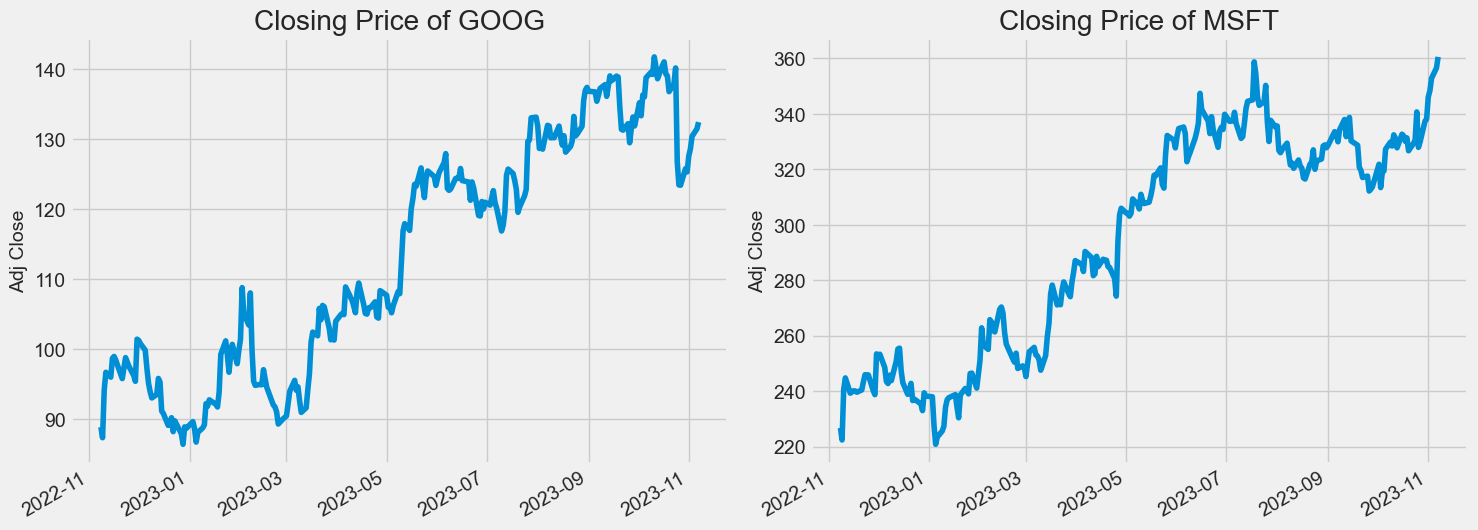

In [47]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

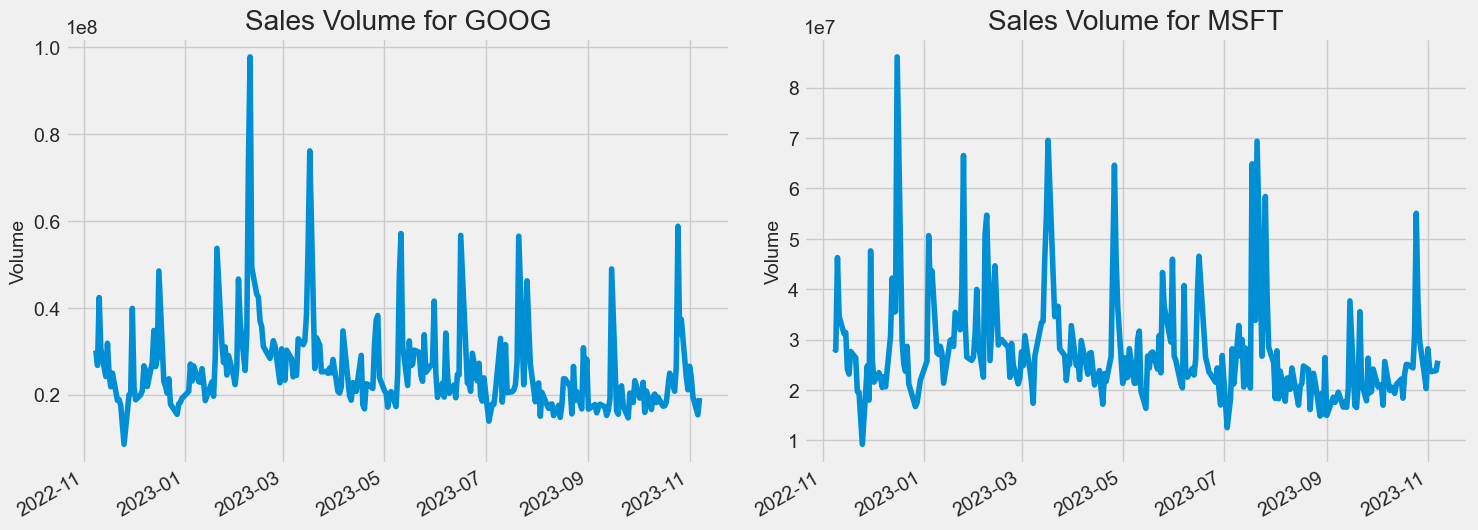

In [48]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

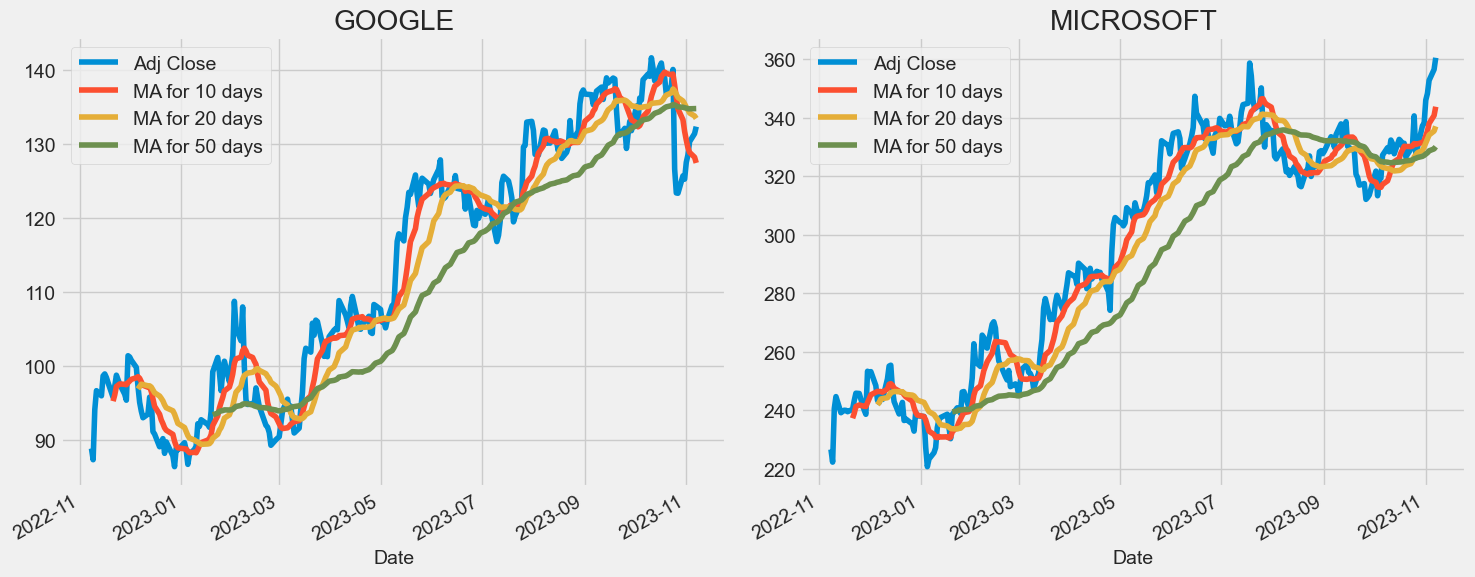

In [52]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(15)

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('MICROSOFT')

fig.tight_layout()

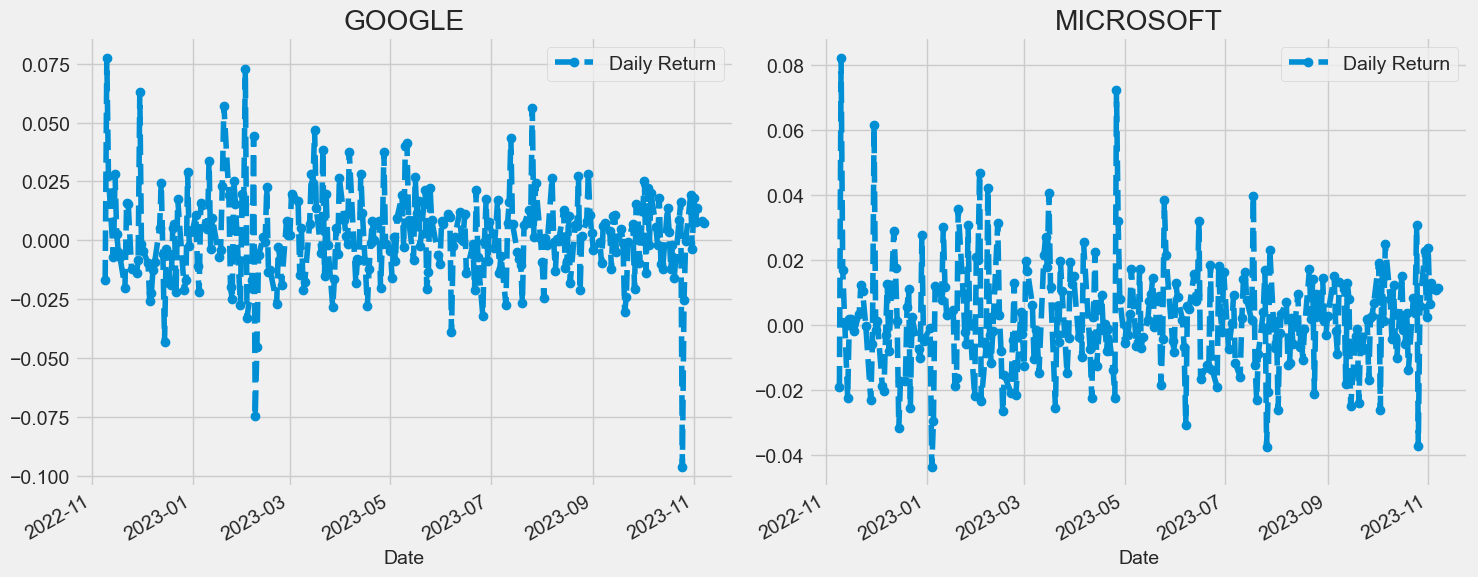

In [53]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(15)

GOOG['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('MICROSOFT')

fig.tight_layout()

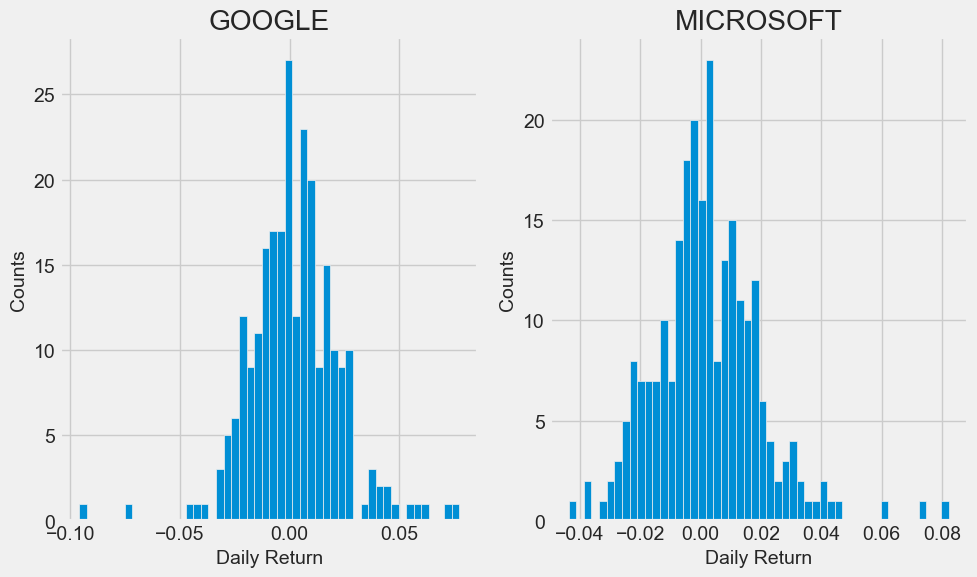

In [55]:
plt.figure(figsize=(10, 6))

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [56]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  2 of 2 completed


,GOOG,MSFT
Date,,
2022-11-08,NaN,NaN
2022-11-09,-0.016983,-0.019050
2022-11-10,0.077460,0.082268
2022-11-11,0.027185,0.016997
2022-11-14,-0.007237,-0.022500


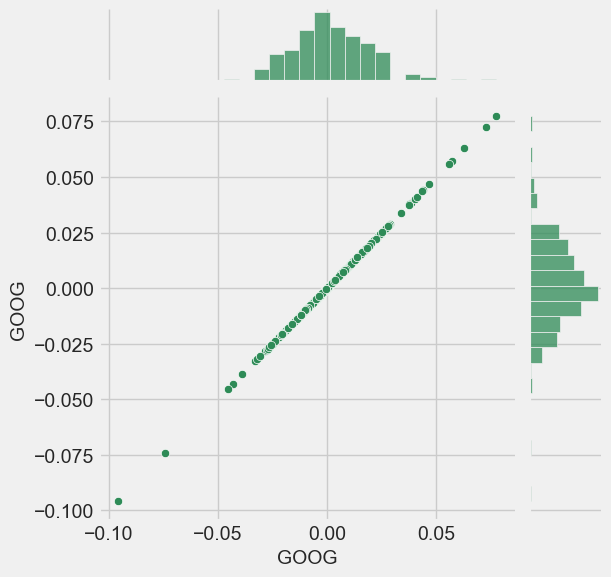

In [57]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

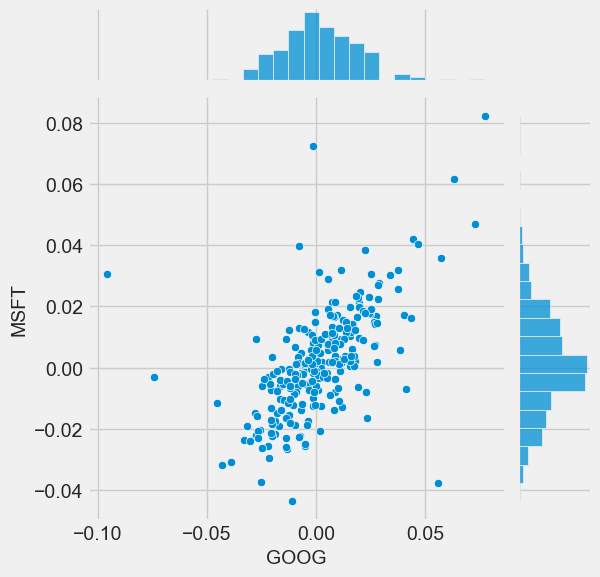

In [58]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

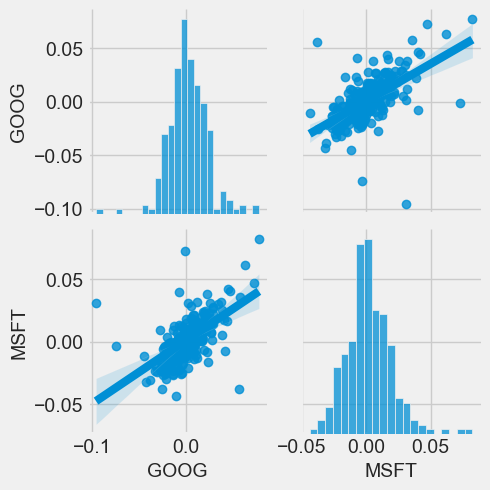

In [59]:
sns.pairplot(tech_rets, kind='reg')

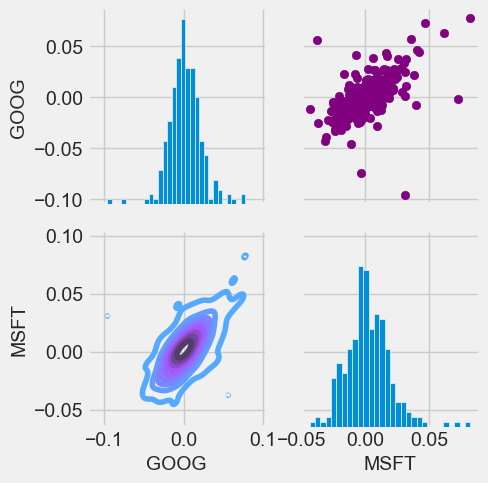

In [60]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

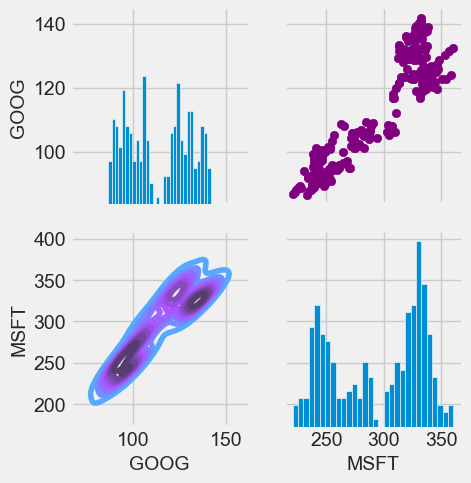

In [61]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

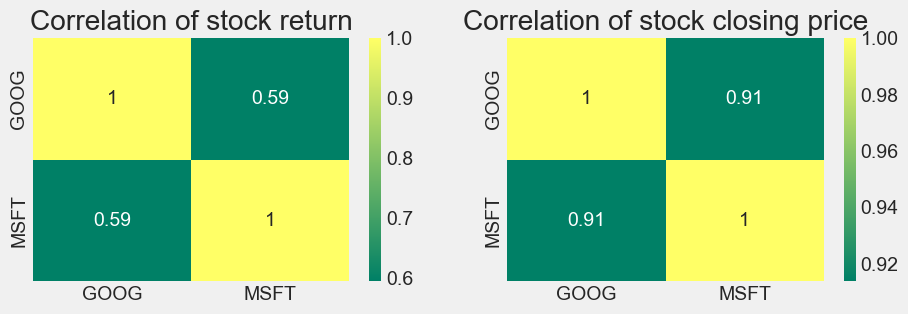

In [62]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(1, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

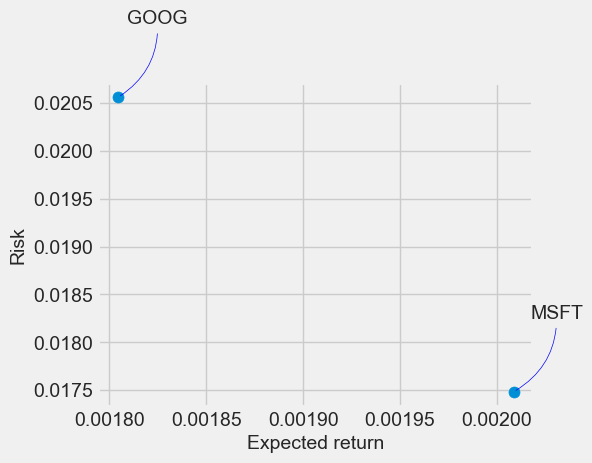

In [63]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(5, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [64]:
df = pdr.get_data_yahoo('MSFT', start='2022-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,329.394867,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,323.746704,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,311.318726,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,308.858765,39646100
2022-01-07,314.149994,316.500000,310.089996,314.040009,309.016174,32720000
...,...,...,...,...,...,...
2023-11-01,339.790009,347.420013,339.649994,346.070007,346.070007,28158800
2023-11-02,347.239990,348.829987,344.769989,348.320007,348.320007,24348100
2023-11-03,349.630005,354.390015,347.329987,352.799988,352.799988,23624000


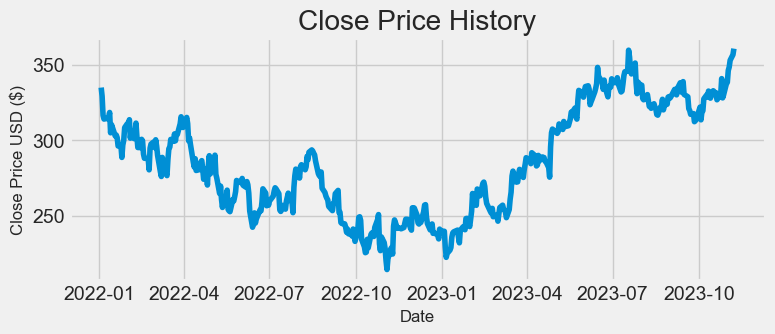

In [65]:
plt.figure(figsize=(8,3))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.show()

In [66]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

442

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.82376265],
       [0.78452291],
       [0.69818161],
       [0.6810911 ],
       [0.68218492],
       [0.68375711],
       [0.68861096],
       [0.71110193],
       [0.61901824],
       [0.65593391],
       [0.60432044],
       [0.60896901],
       [0.59714251],
       [0.5590648 ],
       [0.56138909],
       [0.50751976],
       [0.56371337],
       [0.58511073],
       [0.64267166],
       [0.66126615],
       [0.64608976],
       [0.6782198 ],
       [0.5947498 ],
       [0.62681162],
       [0.59269902],
       [0.61737762],
       [0.66283834],
       [0.60247474],
       [0.55229703],
       [0.55202352],
       [0.58941757],
       [0.58278644],
       [0.522833  ],
       [0.5036915 ],
       [0.50225596],
       [0.45132615],
       [0.54922065],
       [0.56781514],
       [0.57793279],
       [0.55168179],
       [0.58750344],
       [0.55831292],
       [0.51688533],
       [0.44202901],
       [0.42111024],
       [0.50758819],
       [0.48769481],
       [0.449

In [68]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.82376265, 0.78452291, 0.69818161, 0.6810911 , 0.68218492,
       0.68375711, 0.68861096, 0.71110193, 0.61901824, 0.65593391,
       0.60432044, 0.60896901, 0.59714251, 0.5590648 , 0.56138909,
       0.50751976, 0.56371337, 0.58511073, 0.64267166, 0.66126615,
       0.64608976, 0.6782198 , 0.5947498 , 0.62681162, 0.59269902,
       0.61737762, 0.66283834, 0.60247474, 0.55229703, 0.55202352,
       0.58941757, 0.58278644, 0.522833  , 0.5036915 , 0.50225596,
       0.45132615, 0.54922065, 0.56781514, 0.57793279, 0.55168179,
       0.58750344, 0.55831292, 0.51688533, 0.44202901, 0.42111024,
       0.50758819, 0.48769481, 0.44995904, 0.42514358, 0.49835927,
       0.54785354, 0.55352749, 0.58914406, 0.58046216, 0.61395952,
       0.58271801, 0.61423302, 0.61136173, 0.65935202, 0.69155048])]
[0.68095423969651]

[array([0.82376265, 0.78452291, 0.69818161, 0.6810911 , 0.68218492,
       0.68375711, 0.68861096, 0.71110193, 0.61901824, 0.65593391,
       0.60432044, 0.60896901, 0.59714

In [69]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

382/382 [==============================] - 14s 29ms/step - loss: 0.0069


In [70]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 897ms/step


9.467016413498637

C:\Users\Beaulah Innasimuthu\AppData\Local\Temp\ipykernel_19752\1433164744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


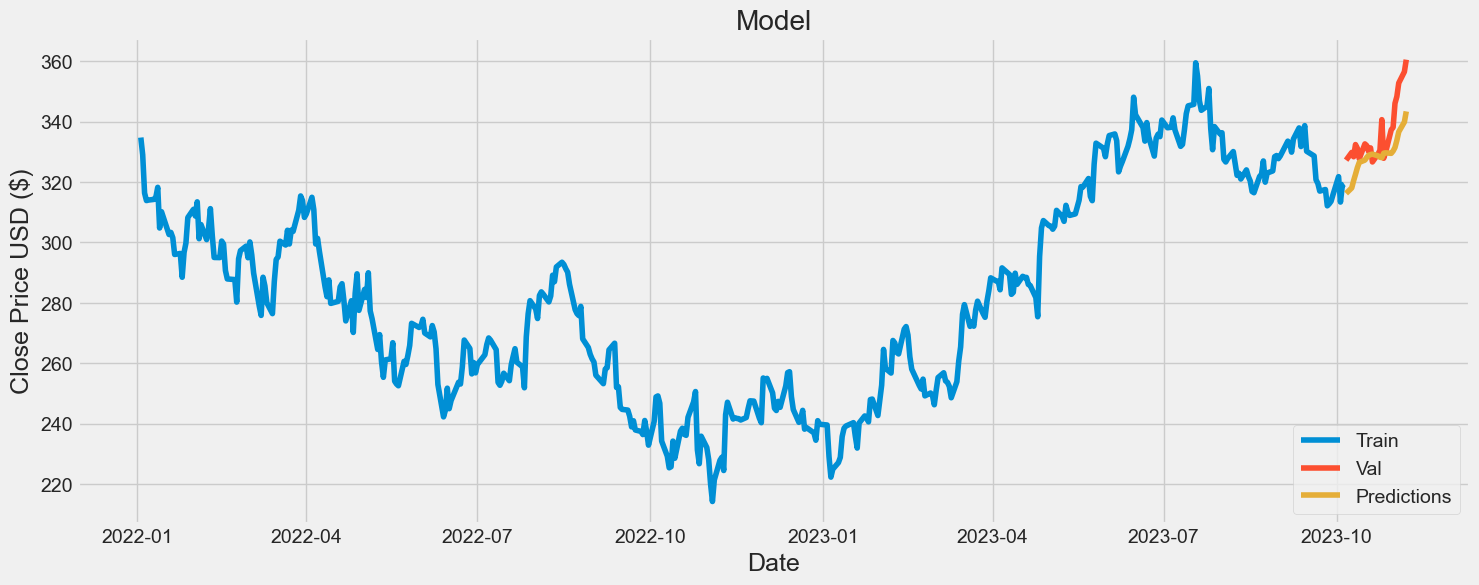

In [71]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [72]:
valid

,Close,Predictions
Date,,
2023-10-06,327.260010,316.251312
2023-10-09,329.820007,318.069702
2023-10-10,328.390015,320.466888
2023-10-11,332.420013,322.562836
2023-10-12,331.160004,324.786896
2023-10-13,327.730011,326.524933
2023-10-16,332.640015,327.278992
2023-10-17,332.059998,328.174744
2023-10-18,330.109985,328.879456
